# Stock Market Analysis

In [2]:
# Import Modules
import os
import sys

import json
from pathlib import Path
import numpy as np
import pandas as pd
import os
import random
import copy
import matplotlib.pyplot as plt
import pandas

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
data_dir = Path('/content/drive/MyDrive/DataSets/')

In [3]:

data_dir = Path('D:/GitHub/DSC680/Project1-stock-market-technical-indicators_and_Prediction/Data/')


## Read the data

In [4]:
os.chdir(data_dir.joinpath('Stocks'))
list = os.listdir()
number_files = len(list)
print('Number of stocks:' + str(number_files))

Number of stocks:7195


### Choose 4 random stock data for analysis

In [5]:

os.chdir(data_dir.joinpath('Stocks'))
filenames = random.sample([x for x in os.listdir() if x.endswith('.txt') 
                           and os.path.getsize(os.path.join('',x)) > 0], 4)
print(filenames)

['eccb.us.txt', 'nom.us.txt', 'tmp.us.txt', 'hstm.us.txt']


### Read data into dataframes and create lable column from filename

In [6]:
data = []
for filename in filenames:
    df = pd.read_csv(os.path.join('',filename), sep=',')
    label, _, _ = filename.split(sep='.')
    df['Label'] = label
    #df['Date'] = pd.to_datetime(df['Date'])
    print('filename:' + os.path.join('',filename) + ' Label:' + label)

    data.append(df)

filename:eccb.us.txt Label:eccb
filename:nom.us.txt Label:nom
filename:tmp.us.txt Label:tmp
filename:hstm.us.txt Label:hstm


In [7]:
data[0].head()

,Date,Open,High,Low,Close,Volume,OpenInt,Label
0,2016-10-14,24.329,24.329,24.119,24.196,25950,0,eccb
1,2016-10-17,24.385,24.385,24.149,24.290,18654,0,eccb
2,2016-10-18,24.196,24.242,24.063,24.158,10295,0,eccb
3,2016-10-19,24.149,24.215,24.139,24.177,16381,0,eccb
4,2016-10-20,24.764,24.764,24.149,24.320,9406,0,eccb


In [22]:
data[1].head()

,Date,Open,High,Low,Close,Volume,OpenInt,Label
0,2007-04-23,15.265,15.265,15.265,15.265,0,0,cnk
1,2007-04-24,15.265,15.507,14.253,15.193,23527887,0,cnk
2,2007-04-25,15.193,15.498,15.193,15.329,4308848,0,cnk
3,2007-04-26,15.507,16.624,15.426,15.675,1436076,0,cnk
4,2007-04-27,15.667,15.748,15.234,15.265,1032058,0,cnk


In [23]:
print(len(data))

4


## Add Technical Indicators in the dataframe

There are many types of Technical Indicators. 
The Technical Indicators we are considering are:
- RSI
- Volume (plain)
- Bollinger Bands
- Aroon Oscillator
- Price Volume Trend
- acceleration bands

In [24]:
TechIndicator = copy.deepcopy(data)

## Calculation of Relative Strength Index (RSI)

### Relative Strength Index
### PriceUp = Price > 0
### PriceDown = Price < 0
### Avg(PriceUp)/(Avg(PriceUP)+Avg(PriceDown)*100
### Where: PriceUp(t)=1*(Price(t)-Price(t-1)){Price(t)- Price(t-1)>0};
### PriceDown(t)=-1*(Price(t)-Price(t-1)){Price(t)- Price(t-1)<0};


In [25]:

def rsi(values):
    up = values[values>0].mean()
    down = -1*values[values<0].mean()
    return 100 * up / (up + down)


In [26]:
# Add Momentum_1D column for all stocks.
# Momentum_1D = P(t) - P(t-1)
for stock in range(len(TechIndicator)):
    TechIndicator[stock]['Momentum_1D'] = (TechIndicator[stock]['Close']-TechIndicator[stock]['Close'].shift(1)).fillna(0)
    TechIndicator[stock]['RSI_14D'] = TechIndicator[stock]['Momentum_1D'].rolling(center=False, window=14).apply(rsi).fillna(0)
TechIndicator[1].tail(5)

,Date,Open,High,Low,Close,Volume,OpenInt,Label,Momentum_1D,RSI_14D
2655,2017-11-06,34.18,34.970,34.08,34.42,1428781,0,cnk,0.05,40.413534
2656,2017-11-07,34.19,34.190,33.13,33.92,1984859,0,cnk,-0.50,38.530466
2657,2017-11-08,33.89,34.630,33.52,33.62,1104228,0,cnk,-0.30,35.652674
2658,2017-11-09,33.24,34.225,33.10,33.90,974806,0,cnk,0.28,38.210933
2659,2017-11-10,33.72,34.285,33.65,33.70,1063099,0,cnk,-0.20,37.164339


In [27]:
TechIndicator[1].head(5)

,Date,Open,High,Low,Close,Volume,OpenInt,Label,Momentum_1D,RSI_14D
0,2007-04-23,15.265,15.265,15.265,15.265,0,0,cnk,0.000,0.0
1,2007-04-24,15.265,15.507,14.253,15.193,23527887,0,cnk,-0.072,0.0
2,2007-04-25,15.193,15.498,15.193,15.329,4308848,0,cnk,0.136,0.0
3,2007-04-26,15.507,16.624,15.426,15.675,1436076,0,cnk,0.346,0.0
4,2007-04-27,15.667,15.748,15.234,15.265,1032058,0,cnk,-0.410,0.0


In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly
import plotly.express as px
import numpy as np

### Calculation of Volume (Plain)

In [29]:
for stock in range(len(TechIndicator)):
    TechIndicator[stock]['Volume_plain'] = TechIndicator[stock]['Volume'].fillna(0)
TechIndicator[0].tail()

,Date,Open,High,Low,Close,Volume,OpenInt,Label,Momentum_1D,RSI_14D,Volume_plain
879,2017-11-02,2.280,2.300,2.20,2.20,6621,0,xtlb,-0.1499,61.889597,6621
880,2017-11-03,2.212,2.212,2.21,2.21,1657,0,xtlb,0.0100,54.944719,1657
881,2017-11-06,2.190,2.470,2.19,2.40,2362,0,xtlb,0.1900,60.364515,2362
882,2017-11-09,2.140,2.262,2.14,2.22,7172,0,xtlb,-0.1800,54.693165,7172
883,2017-11-10,2.420,2.440,2.40,2.44,4182,0,xtlb,0.2200,56.513600,4182


### Calculation of Bollinger Bands

In [30]:
def bbands(price, length=30, numsd=2):
    """ returns average, upper band, and lower band"""
    #ave = pd.stats.moments.rolling_mean(price,length)
    ave = price.rolling(window = length, center = False).mean()
    #sd = pd.stats.moments.rolling_std(price,length)
    sd = price.rolling(window = length, center = False).std()
    upband = ave + (sd*numsd)
    dnband = ave - (sd*numsd)
    return np.round(ave,3), np.round(upband,3), np.round(dnband,3)

In [31]:
for stock in range(len(TechIndicator)):
    TechIndicator[stock]['BB_Middle_Band'], TechIndicator[stock]['BB_Upper_Band'], TechIndicator[stock]['BB_Lower_Band'] = bbands(TechIndicator[stock]['Close'], length=20, numsd=1)
    TechIndicator[stock]['BB_Middle_Band'] = TechIndicator[stock]['BB_Middle_Band'].fillna(0)
    TechIndicator[stock]['BB_Upper_Band'] = TechIndicator[stock]['BB_Upper_Band'].fillna(0)
    TechIndicator[stock]['BB_Lower_Band'] = TechIndicator[stock]['BB_Lower_Band'].fillna(0)
TechIndicator[0].tail()

,Date,Open,High,Low,Close,Volume,OpenInt,Label,Momentum_1D,RSI_14D,Volume_plain,BB_Middle_Band,BB_Upper_Band,BB_Lower_Band
879,2017-11-02,2.280,2.300,2.20,2.20,6621,0,xtlb,-0.1499,61.889597,6621,2.442,2.588,2.296
880,2017-11-03,2.212,2.212,2.21,2.21,1657,0,xtlb,0.0100,54.944719,1657,2.426,2.578,2.273
881,2017-11-06,2.190,2.470,2.19,2.40,2362,0,xtlb,0.1900,60.364515,2362,2.419,2.569,2.268
882,2017-11-09,2.140,2.262,2.14,2.22,7172,0,xtlb,-0.1800,54.693165,7172,2.398,2.546,2.250
883,2017-11-10,2.420,2.440,2.40,2.44,4182,0,xtlb,0.2200,56.513600,4182,2.386,2.517,2.254


### Calculation of Aroon Oscillator

In [32]:
def Aroon_Oscillator(df, tf=25):
    aroonup = []
    aroondown = []
    x = tf
    while x< len(df['Date']):
        aroon_up = ((df['High'][x-tf:x].tolist().index(max(df['High'][x-tf:x])))/float(tf))*100
        aroon_down = ((df['Low'][x-tf:x].tolist().index(min(df['Low'][x-tf:x])))/float(tf))*100
        aroonup.append(aroon_up)
        aroondown.append(aroon_down)
        x+=1
    return aroonup, aroondown

In [33]:
for stock in range(len(TechIndicator)):
    listofzeros = [0] * 25
    up, down = Aroon_Oscillator(TechIndicator[stock])
    aroon_list = [x - y for x, y in zip(up,down)]
    if len(aroon_list)==0:
        aroon_list = [0] * TechIndicator[stock].shape[0]
        TechIndicator[stock]['Aroon_Oscillator'] = aroon_list
    else:
        TechIndicator[stock]['Aroon_Oscillator'] = listofzeros+aroon_list


In [34]:
TechIndicator[0].head()

,Date,Open,High,Low,Close,Volume,OpenInt,Label,Momentum_1D,RSI_14D,Volume_plain,BB_Middle_Band,BB_Upper_Band,BB_Lower_Band,Aroon_Oscillator
0,2013-07-17,31.00,32.25,29.95,31.75,3260,0,xtlb,0.00,0.0,3260,0.0,0.0,0.0,0.0
1,2013-07-19,31.75,33.75,31.75,31.75,4200,0,xtlb,0.00,0.0,4200,0.0,0.0,0.0,0.0
2,2013-07-22,33.50,34.00,33.25,33.50,2300,0,xtlb,1.75,0.0,2300,0.0,0.0,0.0,0.0
3,2013-07-24,31.00,31.00,31.00,31.00,172,0,xtlb,-2.50,0.0,172,0.0,0.0,0.0,0.0
4,2013-07-25,33.50,33.50,33.50,33.50,240,0,xtlb,2.50,0.0,240,0.0,0.0,0.0,0.0


In [35]:
TechIndicator[0].tail()

,Date,Open,High,Low,Close,Volume,OpenInt,Label,Momentum_1D,RSI_14D,Volume_plain,BB_Middle_Band,BB_Upper_Band,BB_Lower_Band,Aroon_Oscillator
879,2017-11-02,2.280,2.300,2.20,2.20,6621,0,xtlb,-0.1499,61.889597,6621,2.442,2.588,2.296,-48.0
880,2017-11-03,2.212,2.212,2.21,2.21,1657,0,xtlb,0.0100,54.944719,1657,2.426,2.578,2.273,-48.0
881,2017-11-06,2.190,2.470,2.19,2.40,2362,0,xtlb,0.1900,60.364515,2362,2.419,2.569,2.268,-48.0
882,2017-11-09,2.140,2.262,2.14,2.22,7172,0,xtlb,-0.1800,54.693165,7172,2.398,2.546,2.250,-48.0
883,2017-11-10,2.420,2.440,2.40,2.44,4182,0,xtlb,0.2200,56.513600,4182,2.386,2.517,2.254,-76.0


### Calculation of Price Volume Trend

PVT = [((CurrentClose - PreviousClose) / PreviousClose) x Volume] + PreviousPVT

In [36]:
for stock in range(len(TechIndicator)):
    TechIndicator[stock]["PVT"] = (TechIndicator[stock]['Momentum_1D']/ TechIndicator[stock]['Close'].shift(1))*TechIndicator[stock]['Volume']
    TechIndicator[stock]["PVT"] = TechIndicator[stock]["PVT"]+TechIndicator[stock]["PVT"].shift(1)
    TechIndicator[stock]["PVT"] = TechIndicator[stock]["PVT"].fillna(0)
TechIndicator[0].tail()

,Date,Open,High,Low,Close,Volume,OpenInt,Label,Momentum_1D,RSI_14D,Volume_plain,BB_Middle_Band,BB_Upper_Band,BB_Lower_Band,Aroon_Oscillator,PVT
879,2017-11-02,2.280,2.300,2.20,2.20,6621,0,xtlb,-0.1499,61.889597,6621,2.442,2.588,2.296,-48.0,-240.325638
880,2017-11-03,2.212,2.212,2.21,2.21,1657,0,xtlb,0.0100,54.944719,1657,2.426,2.578,2.273,-48.0,-414.821431
881,2017-11-06,2.190,2.470,2.19,2.40,2362,0,xtlb,0.1900,60.364515,2362,2.419,2.569,2.268,-48.0,210.599691
882,2017-11-09,2.140,2.262,2.14,2.22,7172,0,xtlb,-0.1800,54.693165,7172,2.398,2.546,2.250,-48.0,-334.832127
883,2017-11-10,2.420,2.440,2.40,2.44,4182,0,xtlb,0.2200,56.513600,4182,2.386,2.517,2.254,-76.0,-123.467568


### Calculation of Acceleration Bands

lower envelope bands around a simple moving average. 

In [37]:
def abands(df):
    #df['AB_Middle_Band'] = pd.rolling_mean(df['Close'], 20)
    df['AB_Middle_Band'] = df['Close'].rolling(window = 20, center=False).mean()
    # High * ( 1 + 4 * (High - Low) / (High + Low))
    df['aupband'] = df['High'] * (1 + 4 * (df['High']-df['Low'])/(df['High']+df['Low']))
    df['AB_Upper_Band'] = df['aupband'].rolling(window=20, center=False).mean()
    # Low *(1 - 4 * (High - Low)/ (High + Low))
    df['adownband'] = df['Low'] * (1 - 4 * (df['High']-df['Low'])/(df['High']+df['Low']))
    df['AB_Lower_Band'] = df['adownband'].rolling(window=20, center=False).mean()

In [38]:
for stock in range(len(TechIndicator)):
    abands(TechIndicator[stock])
    TechIndicator[stock] = TechIndicator[stock].fillna(0)
TechIndicator[0].tail()

,Date,Open,High,Low,Close,Volume,OpenInt,Label,Momentum_1D,RSI_14D,...,BB_Middle_Band,BB_Upper_Band,BB_Lower_Band,Aroon_Oscillator,PVT,AB_Middle_Band,aupband,AB_Upper_Band,adownband,AB_Lower_Band
879,2017-11-02,2.280,2.300,2.20,2.20,6621,0,xtlb,-0.1499,61.889597,...,2.442,2.588,2.296,-48.0,-240.325638,2.442235,2.504444,2.783400,2.004444,2.160175
880,2017-11-03,2.212,2.212,2.21,2.21,1657,0,xtlb,0.0100,54.944719,...,2.426,2.578,2.273,-48.0,-414.821431,2.425735,2.216002,2.747260,2.206002,2.161035
881,2017-11-06,2.190,2.470,2.19,2.40,2362,0,xtlb,0.1900,60.364515,...,2.419,2.569,2.268,-48.0,210.599691,2.418735,3.063648,2.764156,1.663648,2.130731
882,2017-11-09,2.140,2.262,2.14,2.22,7172,0,xtlb,-0.1800,54.693165,...,2.398,2.546,2.250,-48.0,-334.832127,2.398235,2.512762,2.736421,1.902762,2.124996
883,2017-11-10,2.420,2.440,2.40,2.44,4182,0,xtlb,0.2200,56.513600,...,2.386,2.517,2.254,-76.0,-123.467568,2.385735,2.520661,2.695037,2.320661,2.132612


## Cleanup the tables

In [39]:
columns2Drop = ['Momentum_1D', 'aupband', 'adownband']
for stock in range(len(TechIndicator)):
    TechIndicator[stock] = TechIndicator[stock].drop(labels = columns2Drop, axis=1)
TechIndicator[0].head()

,Date,Open,High,Low,Close,Volume,OpenInt,Label,RSI_14D,Volume_plain,BB_Middle_Band,BB_Upper_Band,BB_Lower_Band,Aroon_Oscillator,PVT,AB_Middle_Band,AB_Upper_Band,AB_Lower_Band
0,2013-07-17,31.00,32.25,29.95,31.75,3260,0,xtlb,0.0,3260,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
1,2013-07-19,31.75,33.75,31.75,31.75,4200,0,xtlb,0.0,4200,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
2,2013-07-22,33.50,34.00,33.25,33.50,2300,0,xtlb,0.0,2300,0.0,0.0,0.0,0.0,126.771654,0.0,0.0,0.0
3,2013-07-24,31.00,31.00,31.00,31.00,172,0,xtlb,0.0,172,0.0,0.0,0.0,0.0,113.935833,0.0,0.0,0.0
4,2013-07-25,33.50,33.50,33.50,33.50,240,0,xtlb,0.0,240,0.0,0.0,0.0,0.0,6.519018,0.0,0.0,0.0


# Visualization of technical indicators

In [41]:
for stock in range(len(TechIndicator)):
    TechIndicator[stock].index = TechIndicator[stock]['Date']
    TechIndicator[stock] = TechIndicator[stock].drop(labels = ['Date'], axis = 1)


In [42]:
TechIndicator[0].head()

,Open,High,Low,Close,Volume,OpenInt,Label,RSI_14D,Volume_plain,BB_Middle_Band,BB_Upper_Band,BB_Lower_Band,Aroon_Oscillator,PVT,AB_Middle_Band,AB_Upper_Band,AB_Lower_Band
Date,,,,,,,,,,,,,,,,,
2013-07-17,31.00,32.25,29.95,31.75,3260,0,xtlb,0.0,3260,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
2013-07-19,31.75,33.75,31.75,31.75,4200,0,xtlb,0.0,4200,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
2013-07-22,33.50,34.00,33.25,33.50,2300,0,xtlb,0.0,2300,0.0,0.0,0.0,0.0,126.771654,0.0,0.0,0.0
2013-07-24,31.00,31.00,31.00,31.00,172,0,xtlb,0.0,172,0.0,0.0,0.0,0.0,113.935833,0.0,0.0,0.0
2013-07-25,33.50,33.50,33.50,33.50,240,0,xtlb,0.0,240,0.0,0.0,0.0,0.0,6.519018,0.0,0.0,0.0


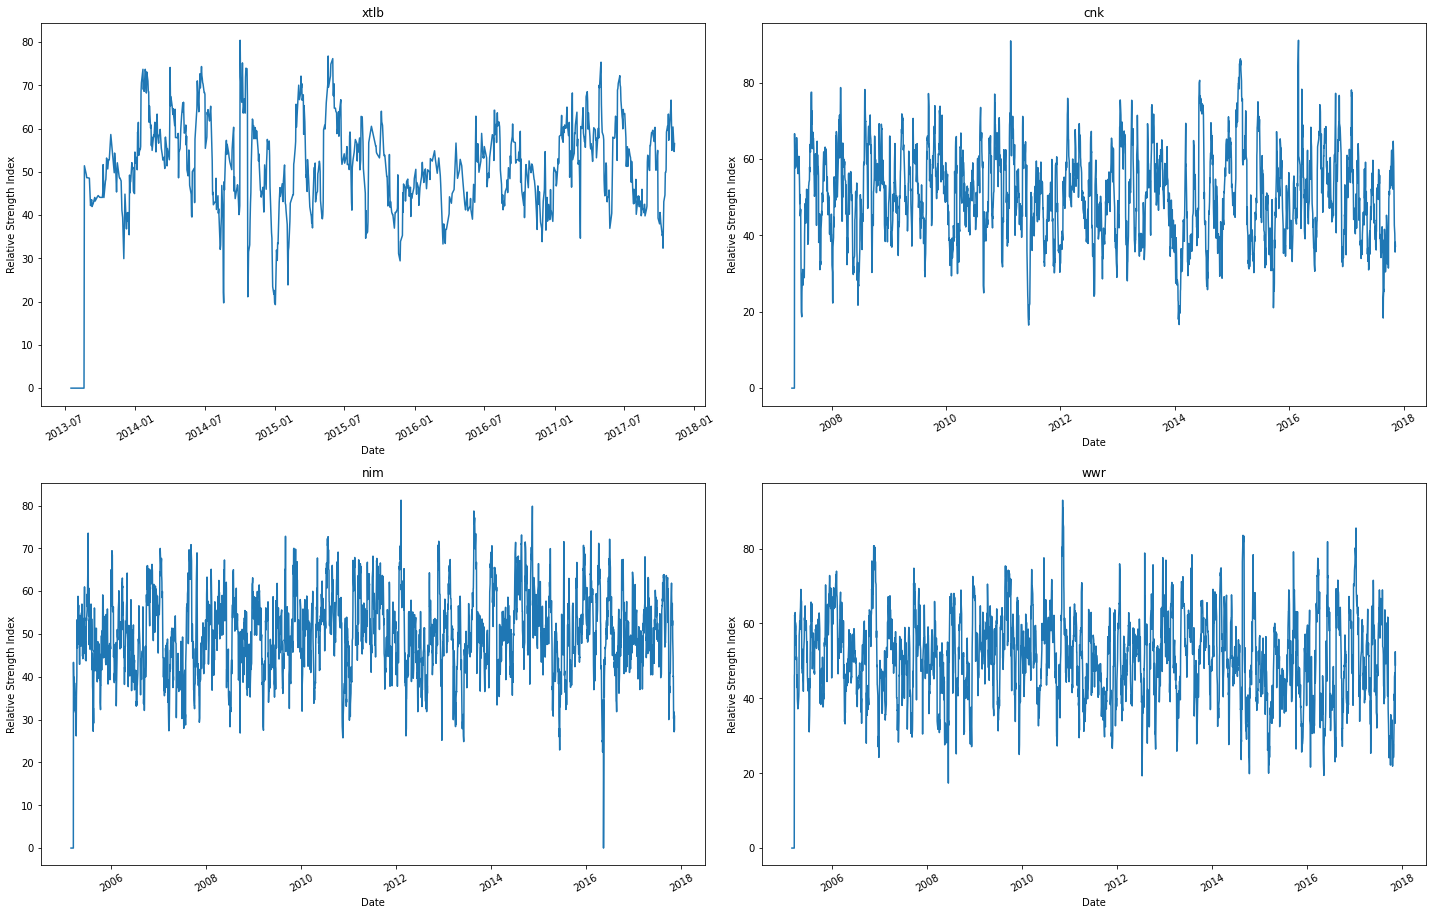

In [46]:
%matplotlib inline

# RSI Plot

fig = plt.figure(figsize=(20,25))
for i in range(4):
    ax = plt.subplot(4,2,i+1)
    ax.plot(TechIndicator[i].index, TechIndicator[i]['RSI_14D'])
    ax.set_title(str(TechIndicator[i]['Label'][0]))
    ax.set_xlabel("Date")
    ax.set_ylabel("Relative Strength Index")
    plt.xticks(rotation=30)
fig.tight_layout()

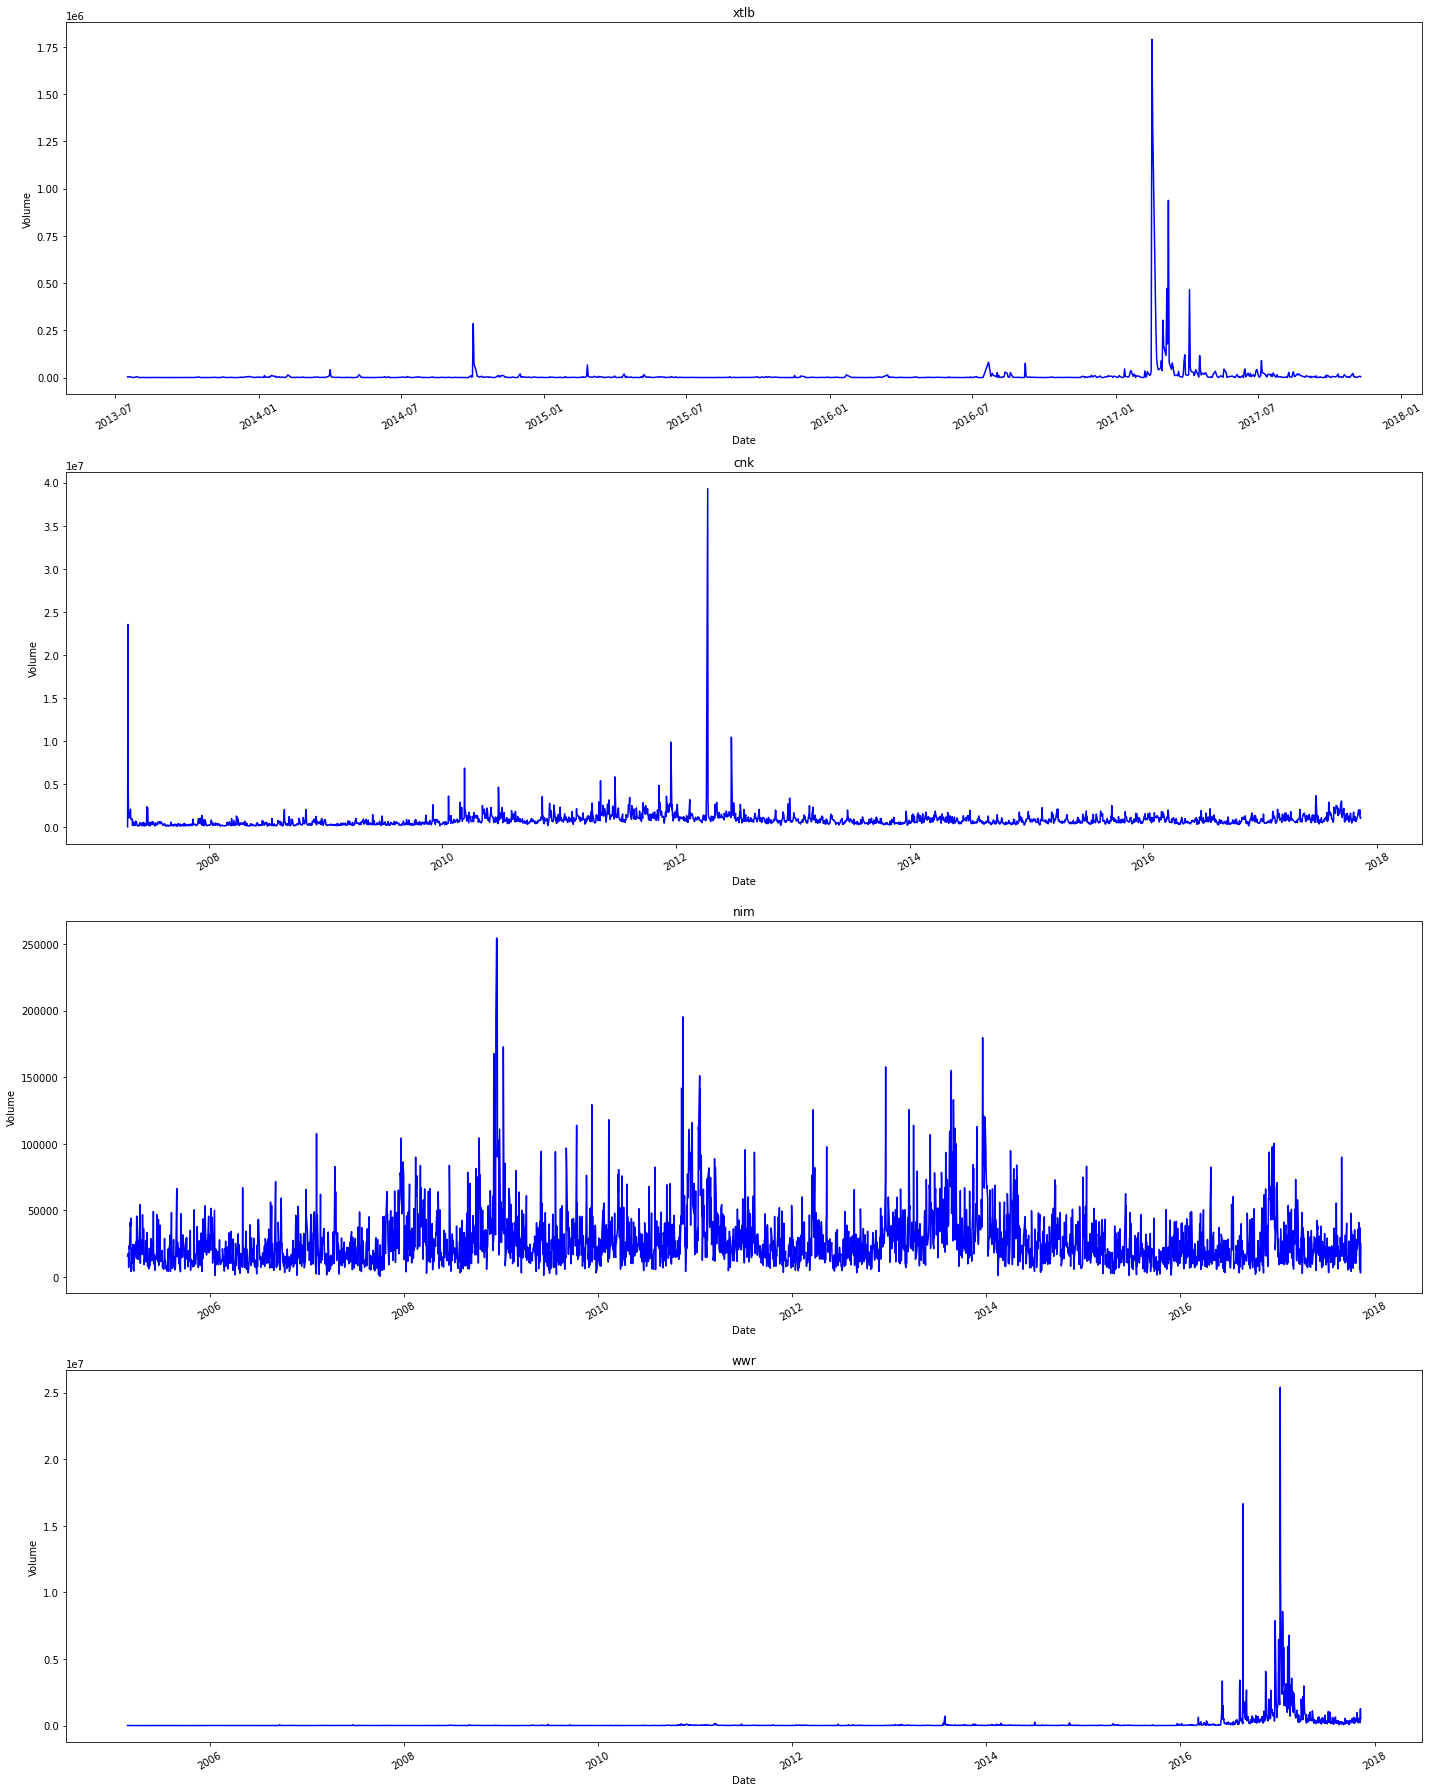

In [44]:
# Volume Plain plot
fig = plt.figure(figsize=(20,25))
for i in range(4):
    ax = plt.subplot(4,1,i+1)
    ax.plot(TechIndicator[i].index, TechIndicator[i]['Volume_plain'], 'b')
    ax.set_title(str(TechIndicator[i]['Label'][0]))
    ax.set_xlabel("Date")
    ax.set_ylabel("Volume")
    plt.xticks(rotation=30)
fig.tight_layout()

Bollinger Bands

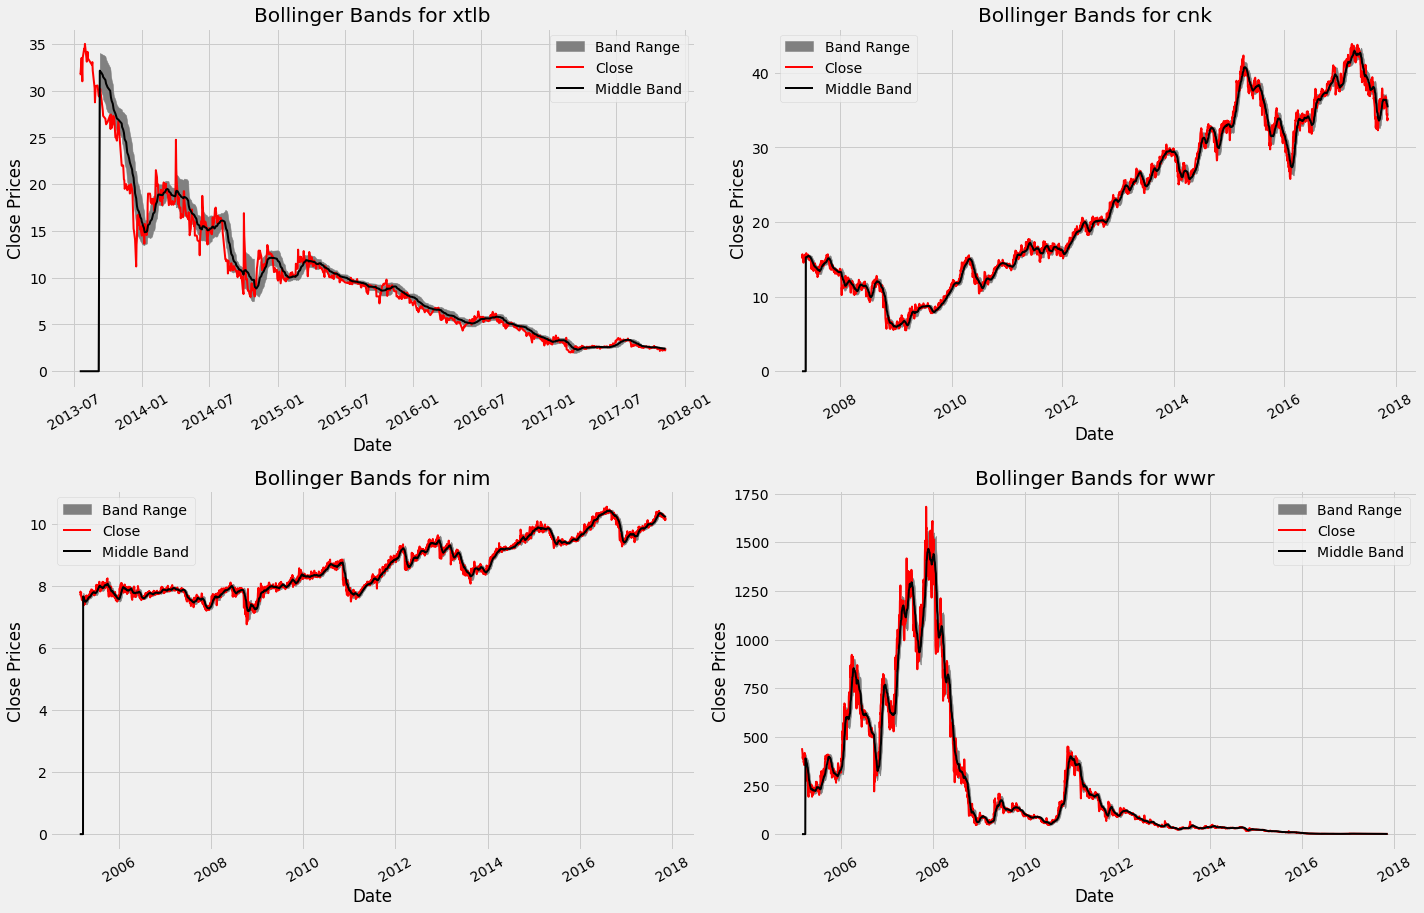

In [48]:
plt.style.use('fivethirtyeight')

fig = plt.figure(figsize=(20,25))
for i in range(4):
    ax = plt.subplot(4,2,i+1)
    ax.fill_between(TechIndicator[i].index, TechIndicator[i]['BB_Upper_Band'], TechIndicator[i]['BB_Lower_Band'], color='grey', label="Band Range")
    # Plot Adjust Closing Price and Moving Averages
    ax.plot(TechIndicator[i].index, TechIndicator[i]['Close'], color='red', lw=2, label="Close")
    ax.plot(TechIndicator[i].index, TechIndicator[i]['BB_Middle_Band'], color='black', lw=2, label="Middle Band")
    ax.set_title("Bollinger Bands for " + str(TechIndicator[i]['Label'][0]))
    ax.legend()
    ax.set_xlabel("Date")
    ax.set_ylabel("Close Prices")
    plt.xticks(rotation=30)
fig.tight_layout()
#.dt.to_pydatetime()

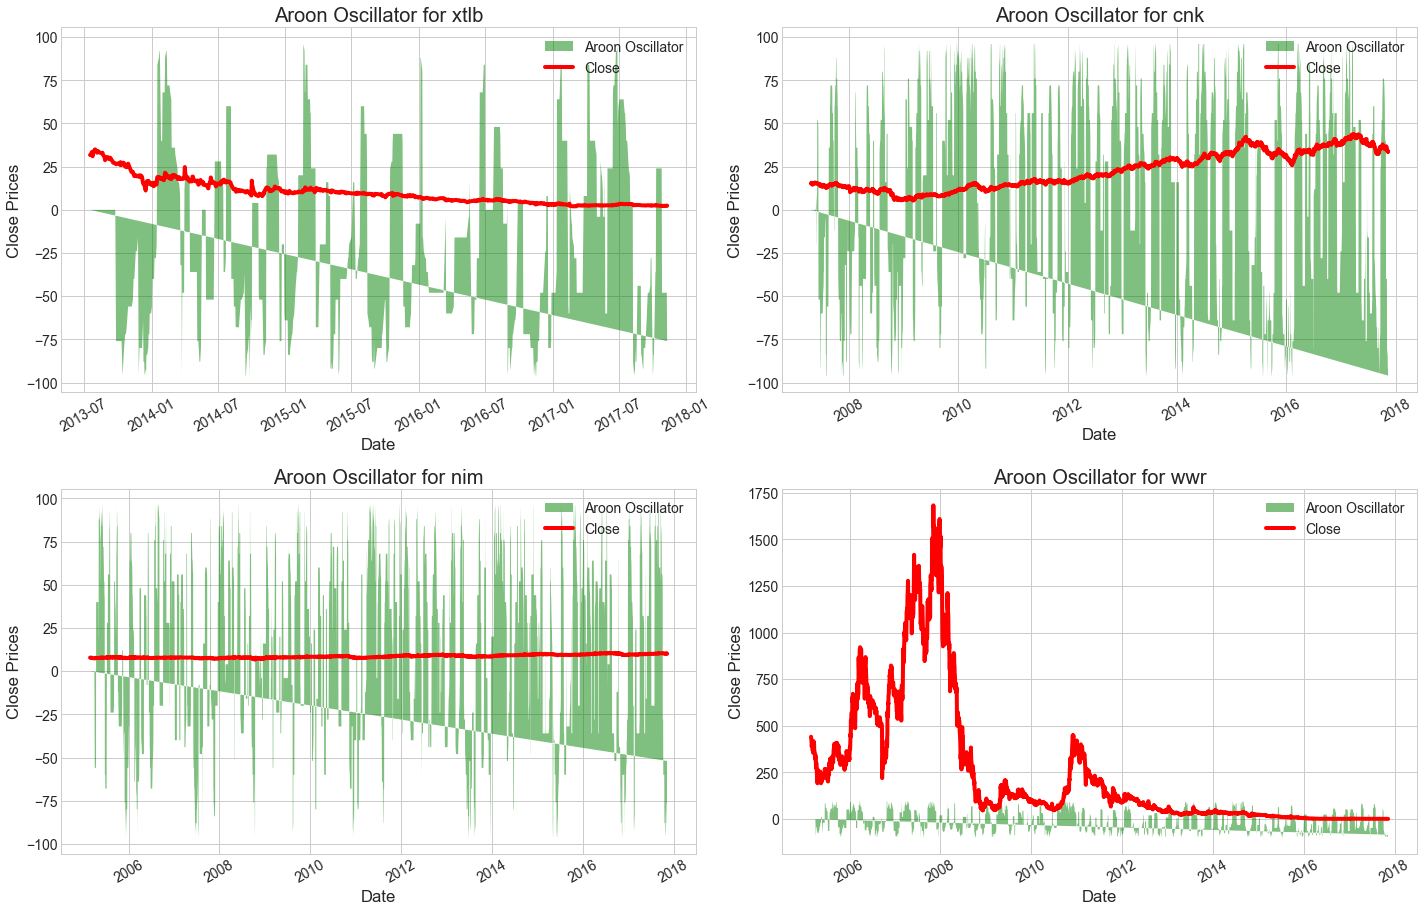

In [49]:
# Aroon Oscillator Plot
plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(20,25))
for i in range(4):
    ax = plt.subplot(4,2,i+1)
    ax.fill(TechIndicator[i].index, TechIndicator[i]['Aroon_Oscillator'],'g', alpha = 0.5, label = "Aroon Oscillator")
    ax.plot(TechIndicator[i].index, TechIndicator[i]['Close'], 'r', label="Close")
    ax.set_title("Aroon Oscillator for " +str(TechIndicator[i]['Label'][0]))
    ax.legend()
    ax.set_xlabel("Date")
    ax.set_ylabel("Close Prices")
    plt.xticks(rotation=30)
fig.tight_layout()

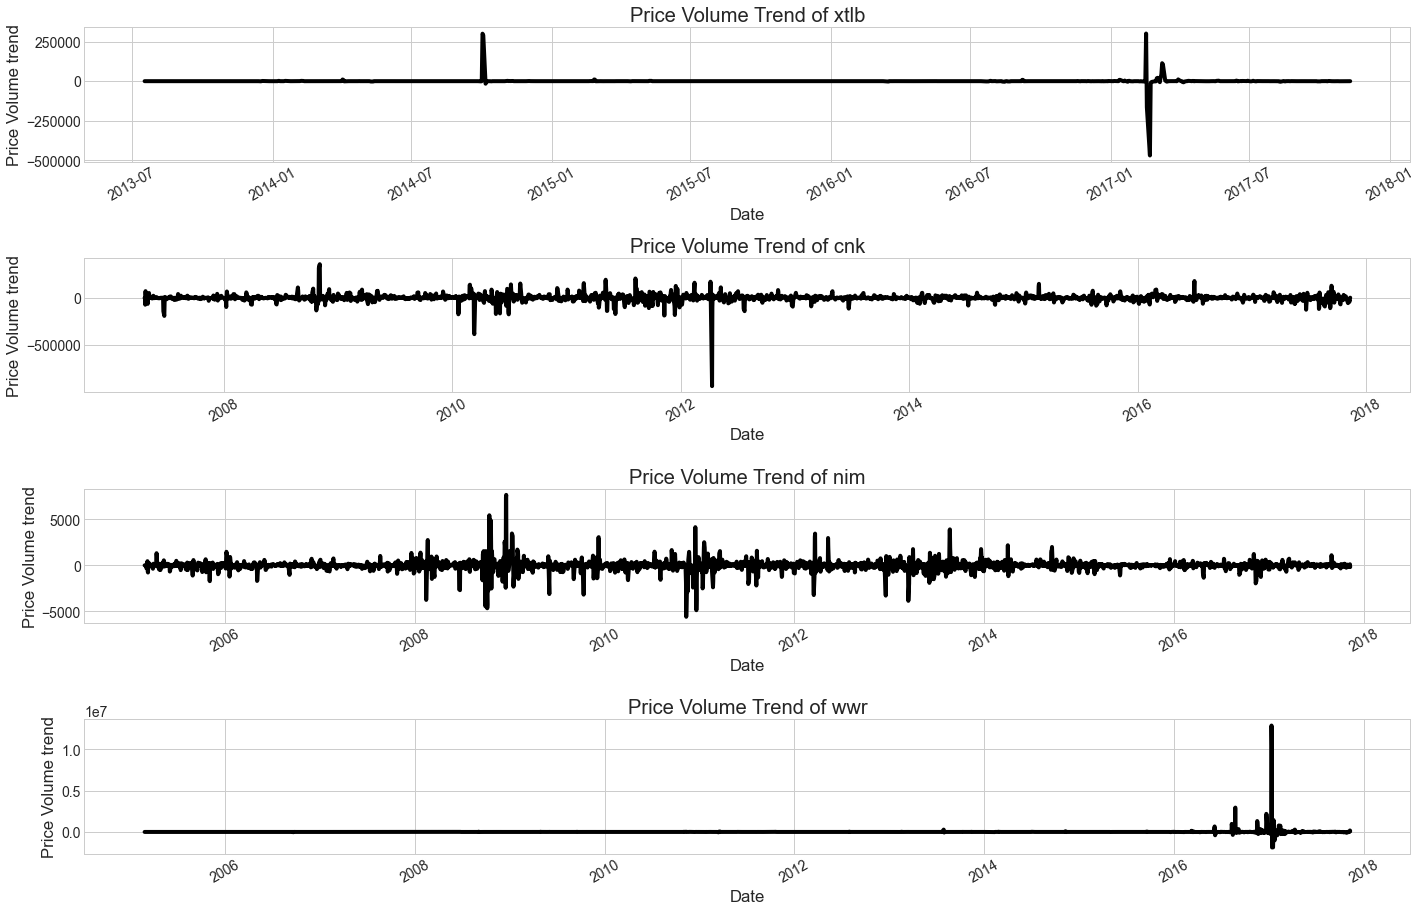

In [50]:
# PRice Volume Trend Plot
fig = plt.figure(figsize=(20,25))
for i in range(4):
    ax = plt.subplot(8,1,i+1)
    ax.plot(TechIndicator[i].index, TechIndicator[i]['PVT'], 'black')
    ax.set_title("Price Volume Trend of " +str(TechIndicator[i]['Label'][0]))
    ax.set_xlabel("Date")
    ax.set_ylabel("Price Volume trend")
    plt.xticks(rotation=30)
fig.tight_layout()

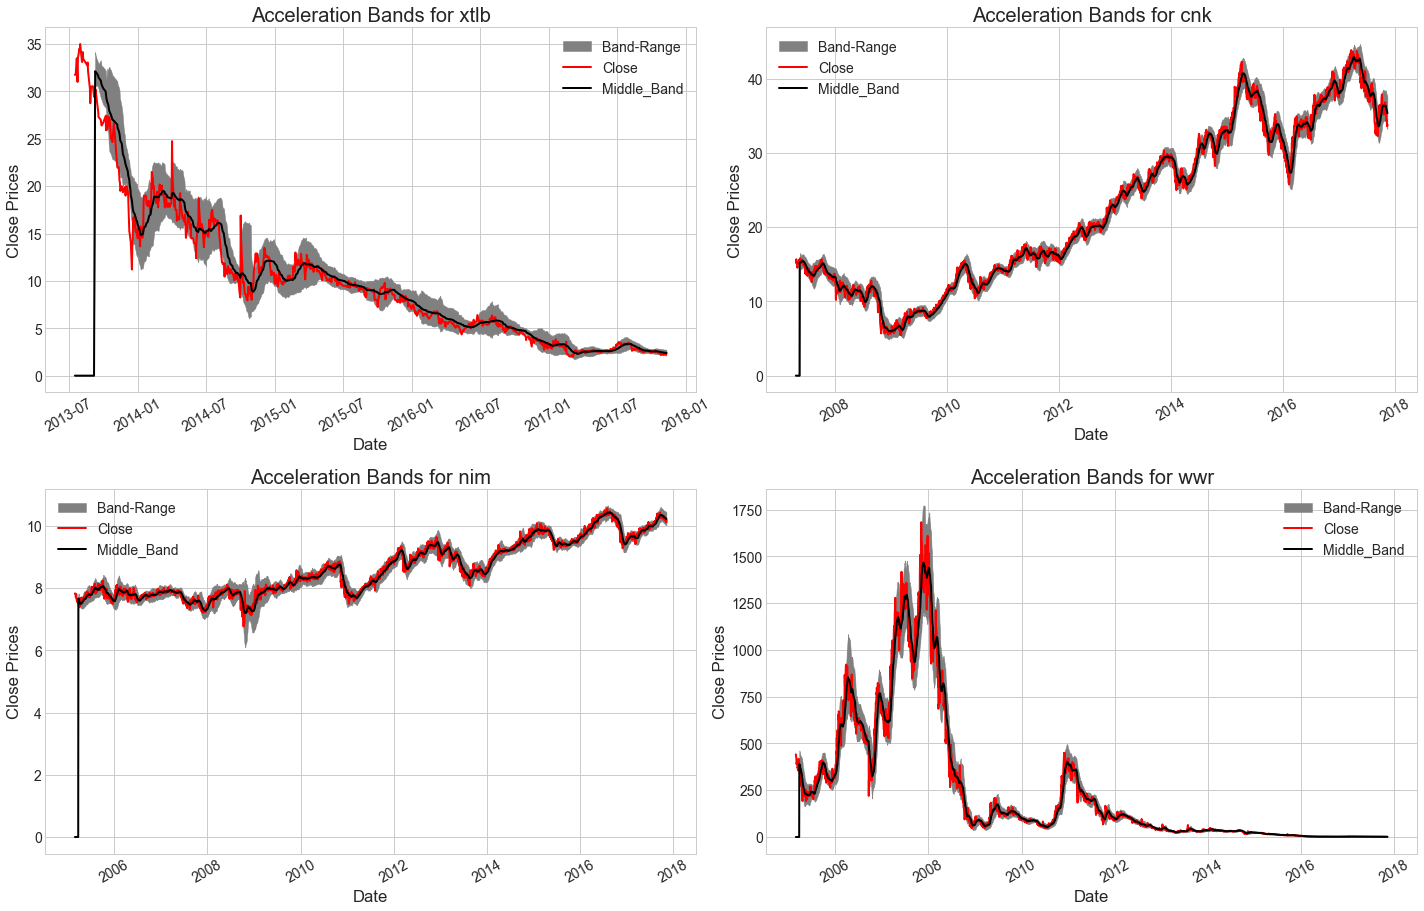

In [51]:
# Acceleration band Plot

fig = plt.figure(figsize=(20,25))
for i in range(4):
    ax = plt.subplot(4,2,i+1)
    ax.fill_between(TechIndicator[i].index, TechIndicator[i]['AB_Upper_Band'], TechIndicator[i]['AB_Lower_Band'], color='grey', label = "Band-Range")
    # Plot Adjust Closing Price and Moving Averages
    ax.plot(TechIndicator[i].index, TechIndicator[i]['Close'], color='red', lw=2, label = "Close")
    ax.plot(TechIndicator[i].index, TechIndicator[i]['AB_Middle_Band'], color='black', lw=2, label="Middle_Band")
    ax.set_title("Acceleration Bands for " + str(TechIndicator[i]['Label'][0]))
    ax.legend()
    ax.set_xlabel("Date")
    ax.set_ylabel("Close Prices")
    plt.xticks(rotation=30)
fig.tight_layout()

# Making Predictions

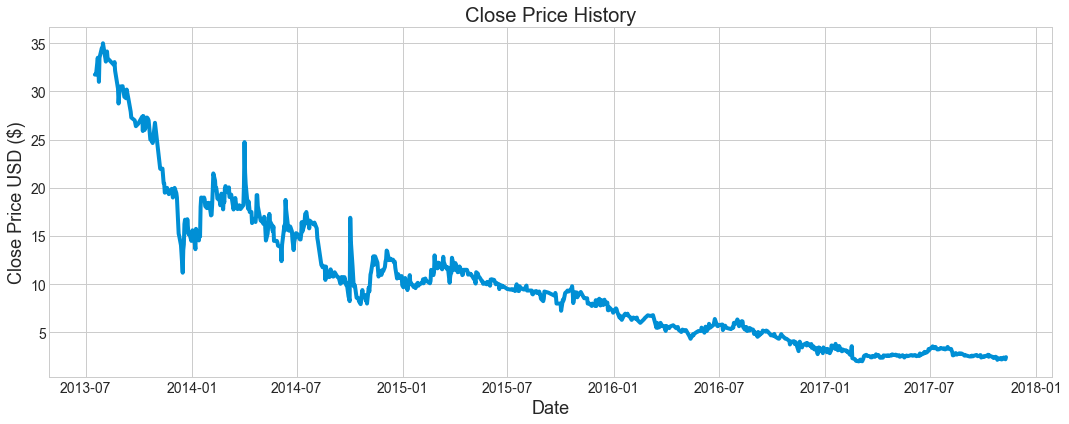

In [52]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(TechIndicator[0]['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [53]:
# Create a new dataframe with only the 'Close column 
data = TechIndicator[0].filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

840

In [54]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[9.01515152e-01],
       [9.01515152e-01],
       [9.54545455e-01],
       [8.78787879e-01],
       [9.54545455e-01],
       [9.84848485e-01],
       [9.77272727e-01],
       [1.00000000e+00],
       [9.42424242e-01],
       [9.74242424e-01],
       [9.53030303e-01],
       [9.31818182e-01],
       [9.40909091e-01],
       [9.13636364e-01],
       [8.57424242e-01],
       [8.10606061e-01],
       [8.63636364e-01],
       [8.65151515e-01],
       [8.31818182e-01],
       [8.27272727e-01],
       [8.54545455e-01],
       [8.25757576e-01],
       [7.84848485e-01],
       [7.66666667e-01],
       [7.57575758e-01],
       [7.39393939e-01],
       [7.46969697e-01],
       [7.69696970e-01],
       [7.24242424e-01],
       [7.71212121e-01],
       [7.27272727e-01],
       [7.42424242e-01],
       [7.66666667e-01],
       [7.65151515e-01],
       [7.62121212e-01],
       [7.57575758e-01],
       [6.96969697e-01],
       [6.95454545e-01],
       [6.86363636e-01],
       [7.50000000e-01],


In [55]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.90151515, 0.90151515, 0.95454545, 0.87878788, 0.95454545,
       0.98484848, 0.97727273, 1.        , 0.94242424, 0.97424242,
       0.9530303 , 0.93181818, 0.94090909, 0.91363636, 0.85742424,
       0.81060606, 0.86363636, 0.86515152, 0.83181818, 0.82727273,
       0.85454545, 0.82575758, 0.78484848, 0.76666667, 0.75757576,
       0.73939394, 0.7469697 , 0.76969697, 0.72424242, 0.77121212,
       0.72727273, 0.74242424, 0.76666667, 0.76515152, 0.76212121,
       0.75757576, 0.6969697 , 0.69545455, 0.68636364, 0.75      ,
       0.60606061, 0.60454545, 0.60606061, 0.56060606, 0.55909091,
       0.53030303, 0.54545455, 0.53636364, 0.53030303, 0.52575758,
       0.53787879, 0.54242424, 0.51515152, 0.54545455, 0.52878788,
       0.51515152, 0.40151515, 0.39393939, 0.37424242, 0.36515152])]
[0.27878787878787875]

[array([0.90151515, 0.90151515, 0.95454545, 0.87878788, 0.95454545,
       0.98484848, 0.97727273, 1.        , 0.94242424, 0.97424242,
       0.9530303 , 0.93181818, 0.94

In [56]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

780/780 [==============================] - 64s 76ms/step - loss: 0.0017


In [57]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

2/2 [==============================] - 2s 41ms/step


1.2316613196001291

C:\Users\safar\AppData\Local\Temp\ipykernel_33620\2388977846.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


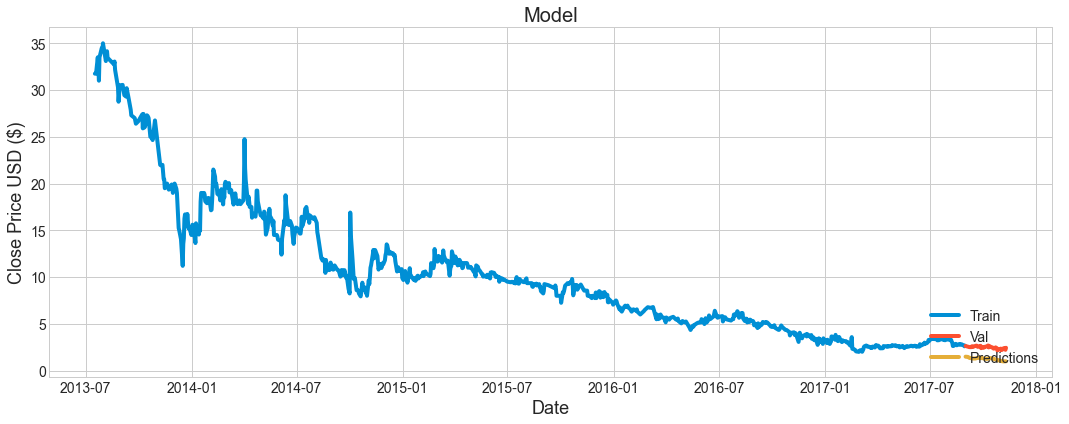

In [58]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [59]:
# Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2017-09-01,2.6299,1.488791
2017-09-05,2.5600,1.460605
2017-09-06,2.5400,1.425504
2017-09-07,2.5200,1.389211
2017-09-08,2.5100,1.354583
2017-09-11,2.5100,1.324264
2017-09-12,2.6000,1.300411
2017-09-13,2.5420,1.297854
2017-09-14,2.5300,1.295611


In [4]:
!pip install -q yfinance

In [11]:
import yfinance as yf
from pandas_datareader import data as pdr
from datetime import datetime
yf.pdr_override()

In [13]:
end = datetime.now()
start = datetime(end.year - 2, end.month, end.day)
print(start,' ', end)
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']
closing_df = pdr.get_data_yahoo(tech_list, start=start, end=end)['Close']

# Make a new tech returns DataFrame
tech_rets = closing_df.pct_change()
tech_rets.head()

2021-03-28 00:00:00   2023-03-28 10:49:59.784948
[*********************100%***********************]  4 of 4 completed


,AAPL,AMZN,GOOG,MSFT
Date,,,,
2021-03-29,NaN,NaN,NaN,NaN
2021-03-30,-0.012274,-0.006646,-0.000199,-0.014411
2021-03-31,0.018766,0.012696,0.006368,0.016907
2021-04-01,0.006959,0.021628,0.033413,0.027909
2021-04-05,0.023577,0.020794,0.041071,0.027728


In [15]:
# Get the stock quote
df = pdr.get_data_yahoo('AMAT', start=start, end=end)
# Show the data
df.tail()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-03-21,123.879997,125.620003,118.410004,120.400002,120.400002,10090100
2023-03-22,120.269997,123.739998,118.690002,118.860001,118.860001,8342500
2023-03-23,121.269997,124.989998,120.169998,122.779999,122.779999,6182200
2023-03-24,121.639999,122.120003,118.050003,119.529999,119.529999,6354500
2023-03-27,120.750000,120.980003,118.320000,118.870003,118.870003,4628200
